# Student Grades

<hr>

## About

Data Analysis techniques are used to see which features do affect the grades of individual student and by selecting relevant features creating a machine learning model to predict the students final grades(G3).

## Data Source

The dataset used her can be found <a href='https://archive.ics.uci.edu/ml/datasets/Student+Performance'>here</a>.

## Data Set Information

>This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 

>Here only the mathematics dataset is used.

<hr>

#### Importing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, learning_curve, cross_val_score

#### Loading the dataset

In [2]:
df = pd.read_csv("student-mat.csv", delimiter=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



### Attribute Information:

`Attributes for both student-mat.csv (Math course):`
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)


31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

`G1, G2, G3 grades are related with the course subject Math.`

In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Getting the average of the grades

In [4]:
df["Average Grades"] = df[["G1", "G2", "G3"]].mean(axis=1)

#### Using Pearson Correlation

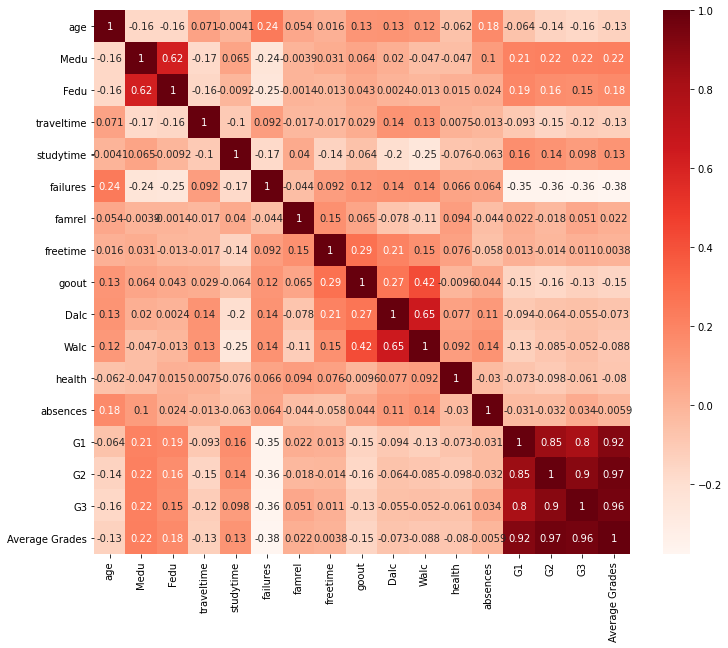

In [5]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

(array([ 8., 10., 12., 25., 27., 50., 47., 50., 52., 40., 40., 16., 12.,
         6.]),
 array([ 1.33333333,  2.61904762,  3.9047619 ,  5.19047619,  6.47619048,
         7.76190476,  9.04761905, 10.33333333, 11.61904762, 12.9047619 ,
        14.19047619, 15.47619048, 16.76190476, 18.04761905, 19.33333333]),
 <a list of 14 Patch objects>)

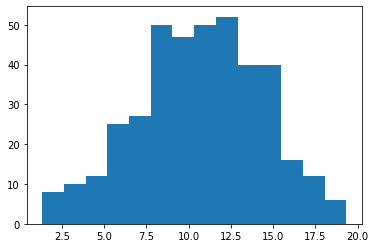

In [6]:
plt.hist(df['Average Grades'], bins = 14)

<hr>

## Looking at the impact of the categorical data

#### Location

Text(0.5, 1.0, 'Density Plot of Final Grades by Location')

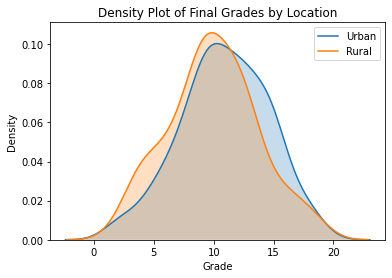

In [7]:
sns.kdeplot(df.loc[df['address'] == 'U', 'Average Grades'], label = 'Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'Average Grades'], label = 'Rural', shade = True)

# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Location')

#### Guardian

Text(0.5, 1.0, 'Density Plot of Final Grades by Guardian')

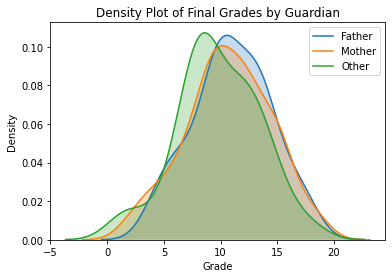

In [8]:
sns.kdeplot(df.loc[df['guardian'] == 'father', 'Average Grades'], label = 'Father', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'mother', 'Average Grades'], label = 'Mother', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'other', 'Average Grades'], label = 'Other', shade = True)

# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Guardian')

#### School Support 

Text(0.5, 1.0, 'Density Plot of Final Grades by School Support')

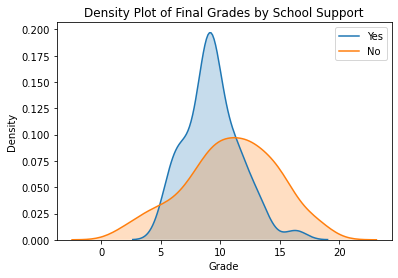

In [9]:
sns.kdeplot(df.loc[df['schoolsup'] == 'yes', 'Average Grades'], label = 'Yes', shade = True)
sns.kdeplot(df.loc[df['schoolsup'] == 'no', 'Average Grades'], label = 'No', shade = True)


# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by School Support')

#### Paid

Text(0.5, 1.0, 'Density Plot of Final Grades by Paid')

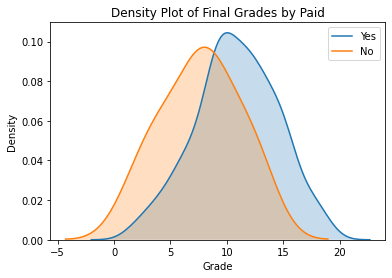

In [10]:
sns.kdeplot(df.loc[df['higher'] == 'yes', 'Average Grades'], label = 'Yes', shade = True)
sns.kdeplot(df.loc[df['higher'] == 'no', 'Average Grades'], label = 'No', shade = True)


# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Paid')

In [11]:
df.corr()['G3'].sort_values()

failures         -0.360415
age              -0.161579
goout            -0.132791
traveltime       -0.117142
health           -0.061335
Dalc             -0.054660
Walc             -0.051939
freetime          0.011307
absences          0.034247
famrel            0.051363
studytime         0.097820
Fedu              0.152457
Medu              0.217147
G1                0.801468
G2                0.904868
Average Grades    0.959873
G3                1.000000
Name: G3, dtype: float64

In [12]:
# Select only categorical variables
category_df = df.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
# dummy_df['Average Grades'] = df['Average Grades']
dummy_df['G3'] = df['G3']

# Find correlations with grade
# dummy_df.corr()['Average Grades'].sort_values()
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

#### One Hot Encoding 

In [13]:
_df = df[['failures', 'Medu', 'studytime', 'Fedu', 'absences', 'G1', 'G2', 'G3', 'Average Grades']]

category_df = df[['higher']]
dummy_df = pd.get_dummies(category_df)
_df[['higher_no', 'higher_yes']] = dummy_df[['higher_no', 'higher_yes']]

_df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,failures,Medu,studytime,Fedu,absences,G1,G2,G3,Average Grades,higher_no,higher_yes
0,0,4,2,4,6,5,6,6,5.666667,0,1
1,0,1,2,1,4,5,5,6,5.333333,0,1
2,3,1,2,1,10,7,8,10,8.333333,0,1
3,0,4,3,2,2,15,14,15,14.666667,0,1
4,0,3,2,3,4,6,10,10,8.666667,0,1


<hr>

## Creating Model

#### Splitting the dataset

In [14]:
# Splitting the dataset

kf = KFold(n_splits=10, shuffle=True)

features = ['failures', 'Medu', 'studytime', 'Fedu', 'absences', 'G1', 'G2', 'higher_no', 'higher_yes']
target = ['G3']

_df = _df.sample(frac=1, random_state=5)

train_dataset = _df[:350]
X_train = train_dataset[features]
y_train = train_dataset[target]

test_dataset = _df[351:395]
X_test = test_dataset[features]
y_test = test_dataset[target]

#### Scaling the input data

In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(np.asanyarray(X_train))
y_train = np.asanyarray(y_train)

X_test = scaler.fit_transform(np.asanyarray(X_test))
y_test = np.asanyarray(y_test)

#### Cross Validation

In [16]:
scoring = 'r2'
score = cross_val_score(linear_model.LinearRegression(), X_train, y_train, cv=10, scoring=scoring)

score.mean()

0.8001227032395507

#### Learning Curve

In [17]:
_sizes = [i for i in range(1, 315, 10)]
train_sizes = np.array([_sizes])  # Relative sizes
scoring = 'neg_mean_squared_error'

lr = linear_model.LinearRegression()

train_sizes_abs, train_scores, cv_scores = learning_curve(lr, X_train, y_train, train_sizes=train_sizes, cv=10, scoring=scoring)

In [18]:
train_scores_mean = []
for row in train_scores:
    _mean = row.mean()
    train_scores_mean.append(_mean)
    
cv_scores_mean = []
for row in cv_scores:
    _mean = row.mean()
    cv_scores_mean.append(_mean)    
    
train_scores_mean = -np.array(train_scores_mean)
cv_scores_mean = -np.array(cv_scores_mean)
    
print(train_scores_mean)
print()
print(cv_scores_mean)

[-0.          1.63130738  1.98146792  4.05421813  4.39946782  4.13079098
  4.15698468  4.60997521  4.91827217  4.70221825  4.89264633  4.6395791
  4.43360774  4.1985298   4.2079426   4.0922151   4.06896253  3.95473215
  3.8603438   3.9014018   4.01084188  3.88377233  3.76384877  3.67340546
  3.7755384   3.65067205  3.64199918  3.63296339  3.56232313  3.85376248
  3.84060499  3.83301642]

[72.73142857 28.80373804 34.95922582 10.54177352  6.99029869  5.94279489
  5.50293411  5.30489175  4.61797489  4.38215411  4.4961897   4.34321126
  4.23797025  4.2367801   4.28035081  4.20912428  4.20554905  4.20570471
  4.18200387  4.22205134  4.22216584  4.17998102  4.15252296  4.13719321
  4.14105467  4.12640638  4.11994281  4.10038384  4.09124072  4.10058029
  4.12804538  4.1006601 ]


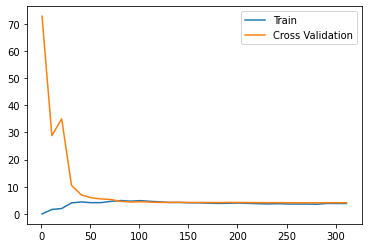

In [19]:
plt.plot(train_sizes_abs, train_scores_mean, label='Train')
plt.plot(train_sizes_abs, cv_scores_mean, label='Cross Validation')

plt.legend()

#### Fitting the model

In [20]:
model = lr.fit(X_train, y_train)

#### Optimal Parameters

In [21]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients: ", coefficients)
print("Intercept: ", model.intercept_)

Coefficients:  [[-0.15769907  0.16145763 -0.20678317 -0.17178126  0.28394902  0.54417287
   3.64471702 -0.04715377  0.04715377]]
Intercept:  [10.38285714]


#### Predicting

In [22]:
y_test_pred = model.predict(X_test)
y_test_pred

array([[10.24886623],
       [10.2330588 ],
       [12.94958331],
       [14.25737925],
       [14.25386681],
       [11.69797385],
       [10.44852164],
       [ 9.71287002],
       [ 5.77355992],
       [19.1011446 ],
       [11.88840199],
       [12.8861731 ],
       [15.18001774],
       [-0.35901721],
       [ 6.61791516],
       [ 7.25116733],
       [12.02554648],
       [10.44190303],
       [-0.54180963],
       [11.32086626],
       [ 5.78789068],
       [12.58986683],
       [ 6.60574117],
       [10.11655882],
       [15.00074817],
       [ 6.37345483],
       [ 9.07877934],
       [ 9.83171552],
       [16.23734656],
       [11.35292859],
       [19.61646279],
       [ 9.19951884],
       [ 4.55000063],
       [ 8.886241  ],
       [15.26090162],
       [12.18387014],
       [10.63164839],
       [ 8.38699711],
       [17.62500448],
       [12.1541157 ],
       [ 6.92147598],
       [ 8.24319107],
       [ 6.31924003],
       [ 8.5040273 ]])

#### Evaluating Model

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:

# To see how our model performs on data that model has NOT seen

rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 1.2491328928830592
R2-score: 0.918804304451577


#### Pipeline

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
scaling = ('scale', StandardScaler())
model = ('model', linear_model.LinearRegression())

# Steps in the pipeline
steps = [scaling, model]

pipe = Pipeline(steps=steps)

# Fiitting the model
model = pipe.fit(X_train, y_train)

# Out-Of-Sample Forecast
y_test_pred = model.predict(X_test)

# Evaluation
rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 1.2491328928830583
R2-score: 0.9188043044515772


#### Saving the model

In [27]:
from joblib import dump

dump(model, 'model.joblib')

['model.joblib']

#### Visualizing our prediction against actual values

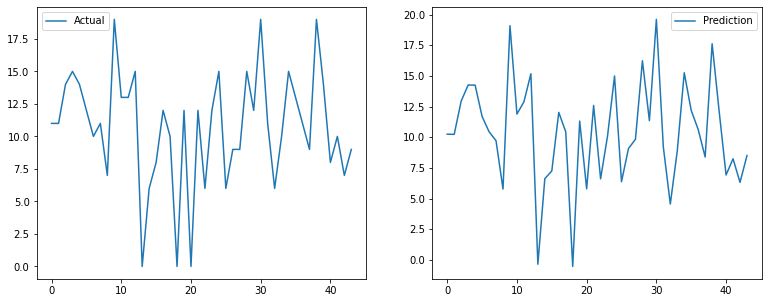

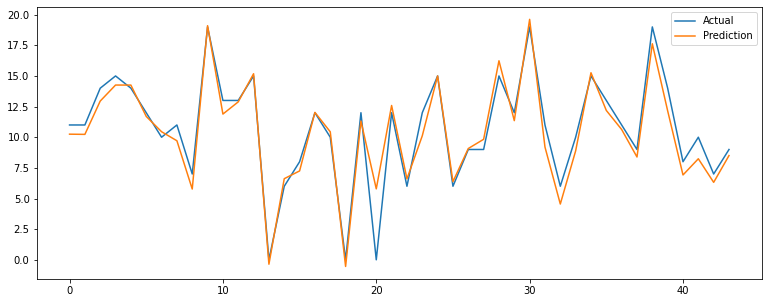

In [28]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax3.legend()


<hr>